# Feature Scaling In Machine Learning

Feature scaling is nothing other than transforming the numerical features into a small range of values. Its name implies that only features are scaled. Labels or output data don't need to be scaled. Feature preprocessing is one of the most crucial steps in building a Machine learning model. The values in each of the features plays a significant role while building ML model. For categorical data, we can encode  them in different ways. 

Handling continuous variables is very important as affects model performance and model building. For an example, features (columns) like income which can range from 20,000 to 100,000, and even more; while an age column which can range from 0 to 100(at the most). Thus, Income is about 1,000 times larger than age.

But how can we be sure that the model treats both these variables equally? When we feed these features to the model as it is, there is every chance that the income will influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So, to give importance to both Age, and Income, we need feature scaling.

#### Why do we need to scale the data ?

Without scaling these features some algorithms, especially the ones which use the calculation of distance between the points will suffer.

Because if we are to measure distance, it could be dominated by the feature which has a higher range, suppressing the effect of others.

For example, the majority of classifiers calculate the distance between two points by the distance. If one of the features has a broad range of values, the distance governs this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
        
If we dont't do feature scaling then the machine learning model gives higher weightage to higher values and lower weightage to lower values. Also, takes a lot of time for training the machine learning model.

The presence of different scales of feature value will affect the step size of the gradient descent. If the features are in different ranges, it will cause different step sizes for every feature. In the image below, let’s say if x1 and x2 are at different scales of data affects the learning rate as it induces different magnitude of step function of different features shown in left size of the below image. To ensure the functionality of the gradient descent moves smoothly towards the minima and steps for gradient descent get updated at the same rate for every feature, we scale the data before feeding it to the model. Unscaled features cause delayed and slow convergence due to the larger steps needed to be taken along the dominant feature.

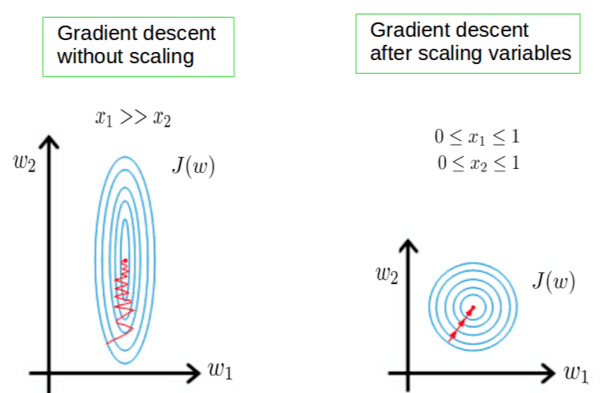

Source: https://www.enjoyalgorithms.com/blog/need-of-feature-scaling-in-machine-learning

        https://medium.datadriveninvestor.com/feature-scaling-in-data-science-5b1e82492727
        
        https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

Some machine learning algorithms are susceptible to normalization or standardization, and some are insensitive to it. Algorithms like SVM, K-NN, K-means, Neural Networks, or Deep-learning are susceptible to normalization/standardization. These algorithms use the spatial relationships ( Space dependent relations) present among the data samples.

Algorithms like Decision trees, Random forests,s or other tree-based algorithms are insensitive scaling techniques such as  normalization or standardization as they are being applied on every feature individually and not influenced by any other feature.

#### Different Scaling techniques

1. MinMax Scaler

2. Standard Scaler

3. Robust Scaler

4. MaxAbsScaler

5. Power Transformer Scaler

7. Box-Cox transform

8. The Yeo-Johnson transform

9. Unit Vector Scaler/Normalizer

10. Custom Transformer

Let's discuss feature scaling techniques:

Source: https://twitter.com/Jeande_d/status/1425766401260888066
        
        https://twitter.com/svpino/status/1425019259386662912

##### 1. MinMax Scaler (a.k.a normalization):

Normalization is a scaling technique that transforms the numerical feature to the range of values between 0 and 1. Here is a formula that is followed when normalizing the data. 

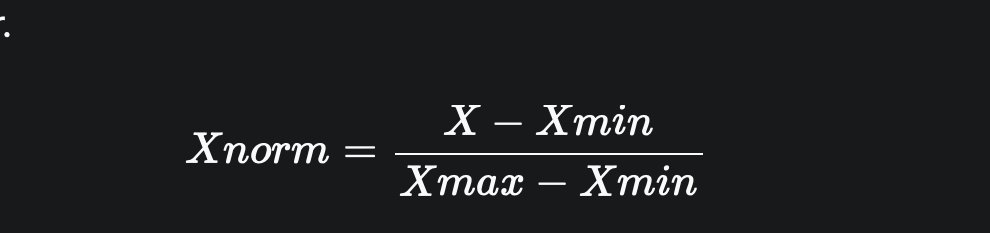


Be wary that this formula should be computed on training and testing data separately, Because otherwise, you would be leaking training data statistics into the test set. Since we know that, scaling both columns to a common, small range will make it easier for our model to converge. So we use Min-Max Scaling and turn each column to a value between 0 and 1.

We have to pay attention to the Min-Max Scaling formula. To scale the columns, we need to compute their min and max values.
Since we haven't split the dataset yet (that will happen in the second step), the scaling will use all of our data to compute these values. The problem: We are using information from the soon-to-be-test data to transform the column! This is not good. 
We call this "data leakage": we are leaking details of the test set into the training data.

How can you avoid Data leakage problem?

Rule of thumb: 
1. Split the data first
2. Set the test set aside
3. Then do any data preparation

**Any time you start with data preparation before splitting your data, you risk leaking data**

**Applying transformations to the entire dataset before splitting it may lead to data leakage**

• A data leak is a way of cheating: you are training your model with information that you aren't supposed to know.

• Always split your data first.

**Whatever transformations you apply to your train set, you have to also apply to your test data and the data you process in production. You should use the same scaler you used on your train data.**

Let's assume Min-Max Scaler. You should use the min and max values computed on the train set to scale both your test and production data.

Assuming you split first. You won't know the true range. For an example the max is greater than the training one, how will you handle values greater than one when scaling values in the validation dataset (and later with actual data)?

To understand that Let's talk about what "true range" means. There are 2 options:

1. You know there's an implicit range.

An example is a column "age." You don't need to look at the data to understand the range.

2. You observe an explicit range.

The only way to know the range is by looking at the data. But you can only look at the data you have: the train set.
You "don't have" the test set. Definition of "true range": the one you can observe on your train data.


###### When should we scale our training data with normalization or minimax scaler?

If features usually have different ranges and scales (or units). For an example, an age feature may vary from 5 to 100, temperature feature from 20 to 500, a month feature from 1 to 12, and so forth.

With these features having different ranges, it's best to scale them into values between 0 and 1. Normalization can work pretty well in this case. **But more specifically, normalization or min-max scaling is a preferrable scaling technique when the data at hand doesn't have a normal or gaussian distribution. If the data's distribution is gaussian, standardization is a preferrable scaling technique(more on this later).**

Talking about the particularities of machine learning **models such as neural networks and K-Nearest Neighbors, normalization is a good choice for these types of algorithms because they don't make any assumption of the input data**.


In [31]:
!pip install seaborn

from seaborn import load_dataset
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
tip_data= load_dataset('tips')
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
numerical_features= tip_data[['total_bill', 'tip', 'size']]
numerical_features.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


For now, let's scale those numerical features with Scikit-Learn preprocessing functions. 

We will use MinMaxScaler which scales the data to the range between 0 and 1 by default. 


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_scaled=scaler.fit_transform(numerical_features)

The output of the scaler is a NumPy array. You can convert it back to a Pandas DataFrame.

In [17]:
num_scaled_df=pd.DataFrame(num_scaled, columns=numerical_features.columns)
num_scaled_df.head()

,total_bill,tip,size
0,0.291579,0.001111,0.2
1,0.152283,0.073333,0.4
2,0.375786,0.277778,0.4
3,0.431713,0.256667,0.2
4,0.450775,0.290000,0.6


As you can tell from the above data frame, all features are scaled to values between 0 and 1.

##### 2. Standardization

In standardization, the numerical features are rescaled to have the 0 mean (u) and unity standard deviation (𝜎 =1 ).

Here is the formula of standardization

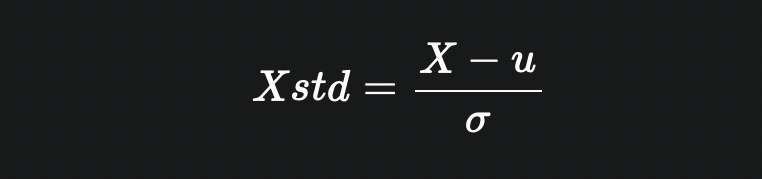

##### When Should you Standardize the Features?

Source: https://twitter.com/Jeande_d/status/1425766401260888066

The standardization scaling technique is **suitable for data that has a normal or gaussian distribution. Some machine learning models such as **support vector machines (with Radial Basis Function (RBF) kernel) and linear models (linear and logistic regression) expect the input data to have a normal distribution**.

1. Normalization is scaling the data to be between 0 and 1. It is preferred when the data doesn't have a normal distribution.


2. Standardization is scaling the data to have 0 mean and unit standard deviation. It is preferred when the data has a normal or gaussian distribution.

In most cases, whether you choose normalization or standardization, it won't make much difference, but it can. So, it makes sense to try both especially if you are not sure about the distribution of the data. Let's implement Standardization in Scikit-Learn.


In [26]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
num_std= std_scalar.fit_transform(numerical_features) # we are using same dataset as mentioned in normalization

Converting  the scaled features into a DataFrame for easy glance

In [29]:
num_std_scaled_df= pd.DataFrame(num_std, columns=numerical_features.columns)
num_std_scaled_df.head()

,total_bill,tip,size
0,-0.314711,-1.439947,-0.600193
1,-1.063235,-0.969205,0.453383
2,0.137780,0.363356,0.453383
3,0.438315,0.225754,-0.600193
4,0.540745,0.443020,1.506958


What standardization does is that it will scale the data to have a 0 mean (u) and unity standard deviation (𝜎 =1 ). 

We can verify that.

As you can see below, all 3 features have 0 mean and unity(1) standard deviation.

In [33]:
print(f'The mean of scaled Data:{np.round(num_std.mean(axis=0))}')
print(f'The Standard Deviation of scaled Data: {num_std.std(axis=0)}')

The mean of scaled Data:[-0.  0. -0.]
The Standard Deviation of scaled Data: [1. 1. 1.]


##### 3. Robust Scaler

Robust scaler is kind of similar to standardization but is used **when the data contains many outliers**. And **instead of dropping the mean, maximum and minimum (All these values are sensitive to outliers) the median is dropped and the data is scaled to the Interquartile Range(IQR)**.  If there are too many outliers in the data, they will influence the mean and the max value or the min value. As we know, the IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

**x_scaled = (x – Q1)/(Q3 – Q1)**

Like normalization and standardization, Roust scaler is also implemented easily in Scikit-Learn.

In [39]:
from sklearn.preprocessing import RobustScaler
rob_scalar= RobustScaler()
num_rob_scaled= rob_scalar.fit_transform(numerical_features)
num_rob_scaled[:5]

array([[-0.07467532, -1.2096    ,  0.        ],
       [-0.69155844, -0.7936    ,  1.        ],
       [ 0.29823748,  0.384     ,  1.        ],
       [ 0.54591837,  0.2624    ,  0.        ],
       [ 0.63033395,  0.4544    ,  2.        ]])

By scaling the data with Robust SCalar, the median of resulting will have a median of Zero

In [41]:
print(f'The median of scaled Data: {np.round(np.median(num_rob_scaled, axis=0))}')

The median of scaled Data: [-0.  0.  0.]


Don't do this:

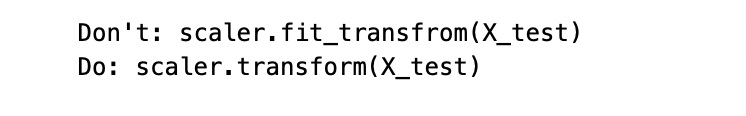

##### 4.MaxAbsScaler

In simplest terms, the MaxAbs scaler takes the **absolute maximum value of each column and divides each value in the column by the maximum value** Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1].

For that, we 1st create a copy of our dataframe and store the numerical feature names in a list, and their values as well:



In [42]:
df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management'],
    'Balance': [100.0, -263.0, 2000.0, -5.0]
})

# We will execute below snippet before using a new scaler every time.

df_scaled = df.copy()
col_names = ['Income', 'Age', 'Balance']
features = df_scaled[col_names]
features

,Income,Age,Balance
0,15000,25,100.0
1,1800,18,-263.0
2,120000,42,2000.0
3,10000,51,-5.0


In [33]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

# We will execute this snippet before using a new scaler every time.

,Income,Age,Department,Balance
0,0.125000,0.490196,HR,0.0500
1,0.015000,0.352941,Legal,-0.1315
2,1.000000,0.823529,Marketing,1.0000
3,0.083333,1.000000,Management,-0.0025


In [4]:
# before we scaled it
df["Income"].max(), df["Age"].max(), df['Balance'].max()

(120000, 51, 2000.0)

In [5]:
# After we scaled it
df_scaled["Income"].max(), df_scaled["Age"].max(), df_scaled['Balance'].max()

(1.0, 1.0, 1.0)

Therefore, we can see that
each value in the Income column is divided by 12000
each value in the Age column is divided by 51
each value in the Balance column is divided by 2000

#### 5. Quantile Transformer Scaler


QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform distribution. In this case, all the data will be mapped in the range [0, 1], even the outliers which cannot be distinguished anymore from the inliers.

1. It computes the cumulative distribution function (CDF) of the variable 

2. It uses this CDF to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data. Here is the code for using the Quantile Transformer:

In [22]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Income,Age,Department,Balance
0,0.666667,0.333333,HR,0.666667
1,0.000000,0.000000,Legal,0.000000
2,1.000000,0.666667,Marketing,1.000000
3,0.333333,1.000000,Management,0.333333


#### 6. Normalizer

Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1

If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1


In [44]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default


df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department,Balance
0,15000,25,HR,100.0
1,1800,18,Legal,-263.0
2,120000,42,Marketing,2000.0
3,10000,51,Management,-5.0


#### 7. Power Transformer Scaler

This feature transformation technique is essential while building a linear model. To be more specific, for heteroskedasticity probelm. Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the

1. Box-Cox transform: works with only positive values

2. The Yeo-Johnson transform:  works with both positive and negative values



In [38]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

In [46]:
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department,Balance
0,0.999976,0.001667,HR,0.006667
1,0.989445,0.009894,Legal,-0.144569
2,0.999861,0.000350,Marketing,0.016664
3,0.999987,0.005100,Management,-0.000500
